#### Eleonora Bellasio (15650A)
# <span style="color:orangered">Laboratorio di Simulazione Numerica: Esercitazione 11

### <span style="color:royalblue">Esercizio 11.1

#### Il problema della predizione
Lo scopo di questa esercitazione è quello di effettura una regressione lineare su dati rumorosi con l'utilizzo di una Rete Neurale (NN). Si vuole studiare come l'abilità di fare un buon fit dipenda dalla struttura della NN. L'obiettivo è sviluppare un'intuizione pratica sul perchè fare una predizione sia difficile. 

Si consideri un processo probabilistico che genera dati etichettati $(x,y)$. I dati sono prodotti estrendo campioni dall'equazione 
$$y_i= f(x_i) + \eta_i,$$
dove $f(x_i)$ è una funzione fissata (ma che può essere anche sconosciuta), $\eta_i$ è un rumore gaussiano scorrelato tale che
$$
\langle \eta_i \rangle=0 \\
\langle \eta_i \eta_j \rangle = \delta_{ij} \sigma
$$

Si definiscono $f(x_i)$ le **caratteristiche vere** utilizzate per generare i dati.

Per fare predizioni, si utilizza una NN che dipende dai suoi parametri, pesi e basi. Le funzioni che la NN può nodellizzare rappresentano la **classe di modelli** che può essere utilizzata per provare a modellizzare i dati e fare delle predizioni. Per apprendere i parametri della NN, si allenano i modelli su **set di dati di training** e, in seguito, si testa l'efficienza della NN su dataset *diversi*, i **set di dati di validazione**. Lo scopo di dividere i dati in set di training e di test è il punto del machine learning: **fare predizioni accurate su nuovi dati che il modello non ha mai visto.**

Per misurare l'abilità della NN di fare predizioni, si calcola l'errore quadrato medio (MSE) tra i valori predertti dalla rete $\{y_j^\mathrm{pred}\}$ e i valori veri $\{y_j\}$.
$$
MSE= \frac{1}{N_\mathrm{test}}\sum_{j=1}^{N_\mathrm{test}} (y_j^\mathrm{pred}-y_j)^2
$$

#### Fit lineare 
Si parte considerando un caso semplice:
$$
f(x)=2x+1
$$
Si definiscono i parametri della funzione lineare ideale che si vuole predirre con una regressione lineare con NN.

In [285]:
# target parameters of f(x) = m*x + b
m = 2 # slope
b = 1 # intersect

Si genera un seti di dati di input che deviano leggermente dal comportamento ideale introducendo rumore random

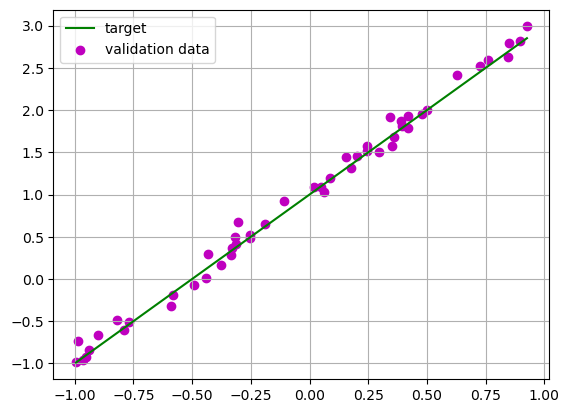

In [286]:
import numpy as np
import matplotlib.pyplot as plt

alpha_value = 0.3

# generate training inputs
np.random.seed(0)
x_train = np.random.uniform(-1, 1, 500)
x_valid = np.random.uniform(-1, 1, 50)
x_valid.sort()
y_target = m * x_valid + b # ideal (target) linear function

sigma = 0.1 # noise standard deviation
y_train = np.random.normal(m * x_train + b, sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(m * x_valid + b, sigma) # dataset di test

# plot validation and target dataset
plt.plot(x_valid, y_target, color = 'g', label='target')
plt.scatter(x_valid, y_valid, color = 'm', label='validation data')
plt.legend()
plt.grid(True)
plt.show()

Si comincia ad utilizzare un semplice modello sequenziale con una solo layer su un solo neurone.

In [287]:
# compose the NN model
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

#Scelgo il modello di keras che voglio utilizzare
model = tf.keras.Sequential()
#Aggiungo al modello un layer densamente connesso con 1 unita' con input_shape 1, ovvero un punto:
model.add(Dense(1, input_shape=(1,)))

# Dopo che ho costruito il modello, configuro il suo processo di learning chiamando il metodo compile. 
# optimizer: specifica l'algoritmo di ottimizzazione che adatta i pesi dei layers durnate il processo di allenamento sgd=stochastic gradient descent
# loss: specifica la funzione da minimizzare duirante l'ottimizzazione
# metrics: giudica la performace del modello ed e' usata per monitorere l'allenamento
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

# get a summary of our composed model
model.summary()

Model: "sequential_41"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_106 (Dense)           (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


Una volta costruito il modello, lo si allena con set di coppie di dati $(x_{train}, y_{train})$ da cui l'ottimizzatore (stochastic gradient descent) trova i migliori pesi per minimizzare la funzione di loss (MSE).

In [288]:
# fit the model using training dataset
# over 10 epochs of 32 batch size each
# report training progress against validation data
history = model.fit(x=x_train, y=y_train,  #training input
          batch_size=32,  #dimensione dei batches in cui il modello spezza i dati e itera su questo numero per il training
                    epochs=30,   #un'iterazione su tutti i dati di input
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))   #per calcolare loss e metrics alla fine di ogni epoca

Epoch 1/30
16/16 [==============================] - 1s 14ms/step - loss: 2.7624 - mse: 2.7624 - val_loss: 2.0995 - val_mse: 2.0995
Epoch 2/30
16/16 [==============================] - 0s 3ms/step - loss: 2.0265 - mse: 2.0265 - val_loss: 1.5647 - val_mse: 1.5647
Epoch 3/30
16/16 [==============================] - 0s 3ms/step - loss: 1.5232 - mse: 1.5232 - val_loss: 1.1999 - val_mse: 1.1999
Epoch 4/30
16/16 [==============================] - 0s 3ms/step - loss: 1.1742 - mse: 1.1742 - val_loss: 0.9373 - val_mse: 0.9373
Epoch 5/30
16/16 [==============================] - 0s 3ms/step - loss: 0.9194 - mse: 0.9194 - val_loss: 0.7396 - val_mse: 0.7396
Epoch 6/30
16/16 [==============================] - 0s 3ms/step - loss: 0.7267 - mse: 0.7267 - val_loss: 0.5885 - val_mse: 0.5885
Epoch 7/30
16/16 [==============================] - 0s 4ms/step - loss: 0.5790 - mse: 0.5790 - val_loss: 0.4707 - val_mse: 0.4707
Epoch 8/30
16/16 [==============================] - 0s 4ms/step - loss: 0.4634 - mse: 0.4

Osservando i pesi e i bias si può capire se il fit lineare ha avuto successo: $w_1$ rappresenta il coefficiente angolare, $b$ rappresenta l'intercetta.

In [289]:
# return weights and biases
model.get_weights()

[array([[1.9124905]], dtype=float32), array([0.9881456], dtype=float32)]

In [290]:
# evaluate model
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

2/2 [==============================] - 0s 2ms/step - loss: 0.0135 - mse: 0.0135

Test loss: 0.013504678383469582
Test accuracy: 0.013504678383469582


In [291]:
# evaluate model with the exact curve
score = model.evaluate(x_valid, y_target, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

2/2 [==============================] - 0s 4ms/step - loss: 0.0025 - mse: 0.0025

Test loss: 0.0024747420102357864
Test accuracy: 0.0024747420102357864


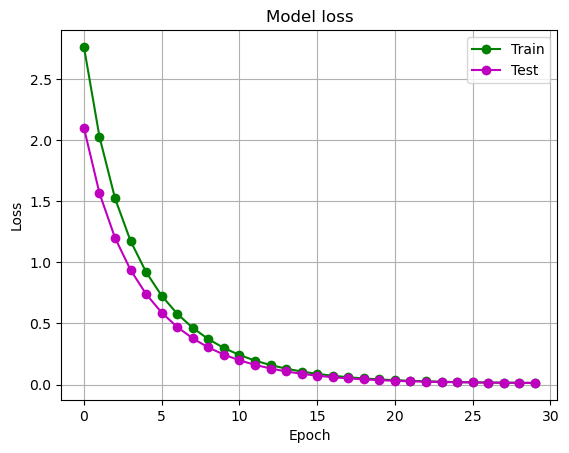

In [292]:
# look into training history
# Plot training & validation loss values
plt.plot(history.history['loss'], color = 'g', marker= 'o', linestyle='-')
plt.plot(history.history['val_loss'], color = 'm', marker= 'o', linestyle='-')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.grid(True)
plt.show()

La loss di test decresce al crescere delle epoche e tende a stsbilizzarsi. Questo andamento suggerisce che le capacità di fittare nuovi dati della rete sono buone e che non si incorre in overfitting (l'overfitting si verifica quando il modello impara troppo bene i dati di training e perde capacità di adattarsi a nuovi dati).

4/4 [==============================] - 0s 1ms/step


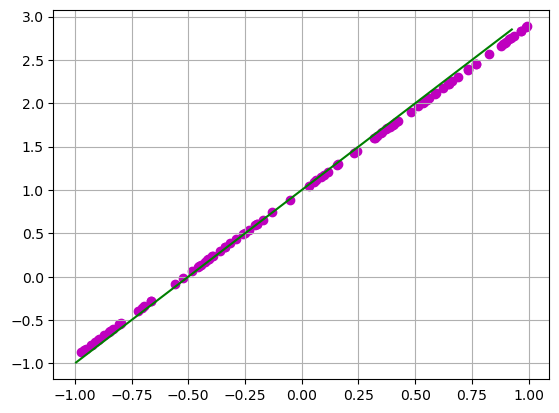

In [293]:
x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color='m', label = 'Prediction')
plt.plot(x_valid, y_target, color = 'g', label = 'Target Function')
plt.grid(True)
plt.show()

La rete neurale che si è costruita ha buone capacità di prefizione anche se ha una struttura molto semplice. 
Ora si vuole capire come la regressione lineare precedente dipende dal numero di epoche, $N_{\mathrm{epochs}}$, dal numero di punti $N_{\mathrm{train}}$ e dal rumore $\sigma$.

#### Caso 1: $\sigma = 0,2$,  $N_{\mathrm{train}}= 800 $, $N_{\mathrm{epochs}}=30$

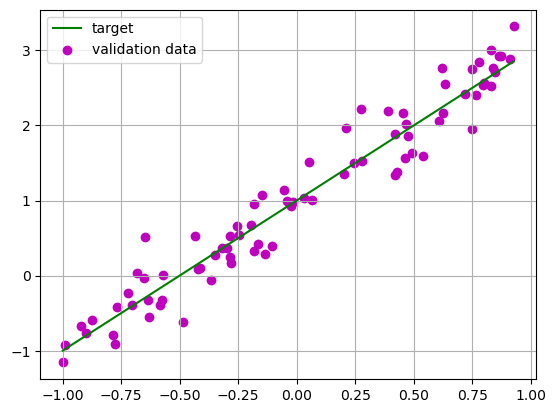

In [294]:
sigma = 0.3
N_epochs = 40
N_train = 800
perc_valid = 10
#-----------------------------------------------
N_valid = int(N_train * perc_valid / 100 )
np.random.seed(0)
x_train = np.random.uniform(-1, 1, N_train)
x_valid = np.random.uniform(-1, 1, N_valid)
x_valid.sort()
y_target = m * x_valid + b # ideal (target) linear function

y_train = np.random.normal(m * x_train + b, sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(m * x_valid + b, sigma) # dataset di test

# plot validation and target dataset
plt.plot(x_valid, y_target, color = 'g', label='target')
plt.scatter(x_valid, y_valid, color = 'm', label='validation data')
plt.legend()
plt.grid(True)
plt.show()

In [295]:
#Scelgo il modello di keras che voglio utilizzare
model = tf.keras.Sequential()
#Aggiungo al modello un layer densamente connesso con 1 unita' con input_shape 1, ovvero un punto:
model.add(Dense(1, input_shape=(1,)))

# Dopo che ho costruito il modello, configuro il suo processo di learning chiamando il metodo compile. 
# optimizer: specifica l'algoritmo di ottimizzazione che adatta i pesi dei layers durnate il processo di allenamento sgd=stochastic gradient descent
# loss: specifica la funzione da minimizzare duirante l'ottimizzazione
# metrics: giudica la performace del modello ed e' usata per monitorere l'allenamento
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

# get a summary of our composed model
model.summary()

Model: "sequential_42"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_107 (Dense)           (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [296]:
history = model.fit(x=x_train, y=y_train,  #training input
          batch_size=32,  #dimensione dei batches in cui il modello spezza i dati e itera su questo numero per il training
                    epochs=N_epochs,   #un'iterazione su tutti i dati di input
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))   #per calcolare loss e metrics alla fine di ogni epoca

Epoch 1/40
25/25 [==============================] - 0s 8ms/step - loss: 3.1181 - mse: 3.1181 - val_loss: 2.4642 - val_mse: 2.4642
Epoch 2/40
25/25 [==============================] - 0s 2ms/step - loss: 2.0392 - mse: 2.0392 - val_loss: 1.6409 - val_mse: 1.6409
Epoch 3/40
25/25 [==============================] - 0s 2ms/step - loss: 1.4011 - mse: 1.4011 - val_loss: 1.1383 - val_mse: 1.1383
Epoch 4/40
25/25 [==============================] - 0s 2ms/step - loss: 0.9939 - mse: 0.9939 - val_loss: 0.8116 - val_mse: 0.8116
Epoch 5/40
25/25 [==============================] - 0s 2ms/step - loss: 0.7201 - mse: 0.7201 - val_loss: 0.5907 - val_mse: 0.5907
Epoch 6/40
25/25 [==============================] - 0s 2ms/step - loss: 0.5318 - mse: 0.5318 - val_loss: 0.4392 - val_mse: 0.4392
Epoch 7/40
25/25 [==============================] - 0s 2ms/step - loss: 0.4007 - mse: 0.4007 - val_loss: 0.3337 - val_mse: 0.3337
Epoch 8/40
25/25 [==============================] - 0s 2ms/step - loss: 0.3085 - mse: 0.30

In [297]:
# return weights and biases
model.get_weights()

[array([[2.0247288]], dtype=float32), array([1.0086441], dtype=float32)]

In [298]:
# evaluate model
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

3/3 [==============================] - 0s 2ms/step - loss: 0.0805 - mse: 0.0805

Test loss: 0.08048919588327408
Test accuracy: 0.08048919588327408


In [299]:
# evaluate model with the exact curve
score = model.evaluate(x_valid, y_target, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

3/3 [==============================] - 0s 2ms/step - loss: 2.8254e-04 - mse: 2.8254e-04

Test loss: 0.0002825445553753525
Test accuracy: 0.0002825445553753525


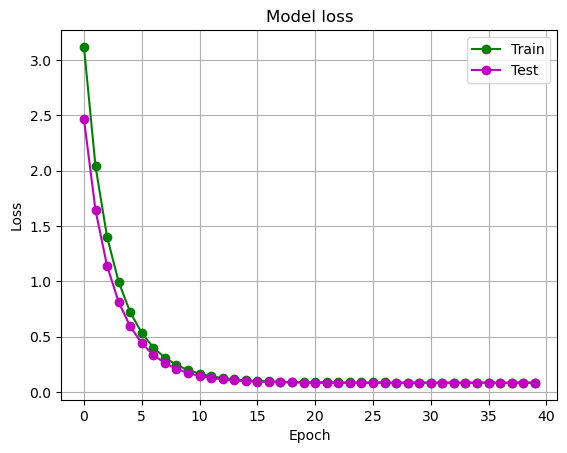

In [300]:
# look into training history
# Plot training & validation loss values
plt.plot(history.history['loss'], color = 'g', marker= 'o', linestyle='-')
plt.plot(history.history['val_loss'], color = 'm', marker= 'o', linestyle='-')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.grid(True)
plt.show()

4/4 [==============================] - 0s 1ms/step


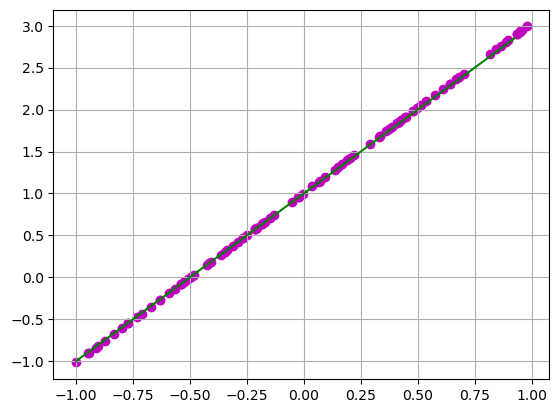

In [301]:
x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color='m', label = 'Prediction')
plt.plot(x_valid, y_target, color = 'g', label = 'Target Function')
plt.grid(True)
plt.show()

In questo secondo caso, che ha una $\sigma$ più grande ma ha anche più dati di training e più epoche, si ottiene un fit migliore.

### <span style="color:royalblue">Esercizio 11.2
Si estende il modello per ottenere un fit del seguente polinomio di ordine 3:
$$
f(x)=4-3x-2x^2+3x^3
$$
for $x \in [-1,1]$.
Si variano i seguenti parametri per cercare di ottenere il fit migliore possibile:
- il numero di livelli
- il numero di neuroni in ciascun livello
- la funzione di attivazione
- l'ottimizzatore
- la funzione di loss

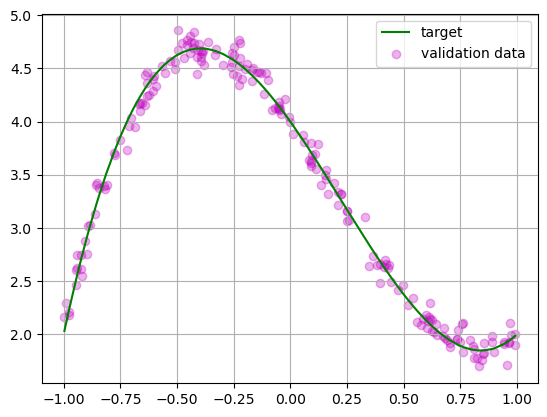

In [302]:
#https://www.tensorflow.org/guide/keras/sequential_model?hl=it
sigma = 0.1
N_epochs = 50
N_train = 10000
perc_valid = 2
#-----------------------------------------------
N_valid = int(N_train * perc_valid / 100 )

np.random.seed(0)
x_train = np.random.uniform(-1, 1, N_train)
x_valid = np.random.uniform(-1, 1, N_valid)
x_valid.sort()

y_target = 4 - 3 * x_valid -  2 * x_valid**2 + 3 * x_valid**3  

y_train = np.random.normal(4 - 3 * x_train -  2 * x_train**2 + 3 * x_train**3  , sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(4 - 3 * x_valid -  2 * x_valid**2 + 3 * x_valid**3  , sigma) # dataset di test

# plot validation and target dataset
plt.plot(x_valid, y_target, color = 'g', label='target')
plt.scatter(x_valid, y_valid, color = 'm', label='validation data', alpha = alpha_value)
plt.legend()
plt.grid(True)
plt.show()

In [303]:
#Scelgo il modello di keras che voglio utilizzare
model = tf.keras.Sequential()
#Aggiungo al modello un layer densamente connesso con 1 unita' con input_shape 1, ovvero un punto:
model.add(Dense(64, input_shape=(1,), activation = 'relu'))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(16, activation = 'relu'))
#model.add(Dense(8, activation = 'relu'))
#model.add(Dense(4, activation = 'relu'))
model.add(Dense(1,)) #1 dato di output

# Dopo che ho costruito il modello, configuro il suo processo di learning chiamando il metodo compile. 
# optimizer: specifica l'algoritmo di ottimizzazione che adatta i pesi dei layers durnate il processo di allenamento sgd=stochastic gradient descent
# loss: specifica la funzione da minimizzare duirante l'ottimizzazione
# metrics: giudica la performace del modello ed e' usata per monitorere l'allenamento
model.compile(optimizer='adam', loss='mse', metrics=['mse']) #https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam

#According to Kingma et al., 2014, the method is "computationally efficient, has little memory requirement, invariant to diagonal rescaling 
#of gradients, and is well suited for problems that are large in terms of data/parameters".

# get a summary of our composed model
model.summary()

Model: "sequential_43"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_108 (Dense)           (None, 64)                128       
                                                                 
 dense_109 (Dense)           (None, 32)                2080      
                                                                 
 dense_110 (Dense)           (None, 16)                528       
                                                                 
 dense_111 (Dense)           (None, 1)                 17        
                                                                 
Total params: 2,753
Trainable params: 2,753
Non-trainable params: 0
_________________________________________________________________


In [304]:
history = model.fit(x=x_train, y=y_train,  #training input
          batch_size=32,  #dimensione dei batches in cui il modello spezza i dati e itera su questo numero per il training
                    epochs=N_epochs,   #un'iterazione su tutti i dati di input
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))   #per calcolare loss e metrics alla fine di ogni epoca

Epoch 1/50
313/313 [==============================] - 1s 3ms/step - loss: 2.5121 - mse: 2.5121 - val_loss: 0.0600 - val_mse: 0.0600
Epoch 2/50
313/313 [==============================] - 1s 2ms/step - loss: 0.0232 - mse: 0.0232 - val_loss: 0.0104 - val_mse: 0.0104
Epoch 3/50
313/313 [==============================] - 1s 2ms/step - loss: 0.0113 - mse: 0.0113 - val_loss: 0.0098 - val_mse: 0.0098
Epoch 4/50
313/313 [==============================] - 1s 2ms/step - loss: 0.0108 - mse: 0.0108 - val_loss: 0.0100 - val_mse: 0.0100
Epoch 5/50
313/313 [==============================] - 1s 2ms/step - loss: 0.0106 - mse: 0.0106 - val_loss: 0.0109 - val_mse: 0.0109
Epoch 6/50
313/313 [==============================] - 1s 2ms/step - loss: 0.0109 - mse: 0.0109 - val_loss: 0.0101 - val_mse: 0.0101
Epoch 7/50
313/313 [==============================] - 1s 2ms/step - loss: 0.0109 - mse: 0.0109 - val_loss: 0.0097 - val_mse: 0.0097
Epoch 8/50
313/313 [==============================] - 1s 2ms/step - loss: 0.

In [305]:
# evaluate model
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

7/7 [==============================] - 0s 2ms/step - loss: 0.0097 - mse: 0.0097

Test loss: 0.00973374955356121
Test accuracy: 0.00973374955356121


In [306]:
# evaluate model with the exact curve
score = model.evaluate(x_valid, y_target, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

7/7 [==============================] - 0s 2ms/step - loss: 3.8509e-04 - mse: 3.8509e-04

Test loss: 0.000385090708732605
Test accuracy: 0.000385090708732605


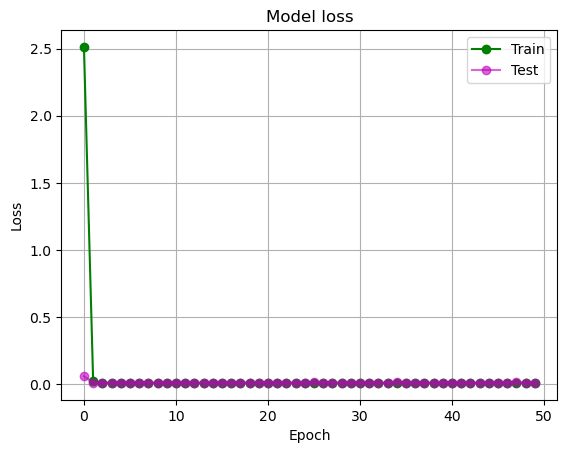

In [307]:
# look into training history
# Plot training & validation loss values
plt.plot(history.history['loss'], color = 'g', marker= 'o', linestyle='-')
plt.plot(history.history['val_loss'], color = 'm', marker= 'o', linestyle='-', alpha = 2*alpha_value)
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.grid(True)
plt.show()

4/4 [==============================] - 0s 2ms/step


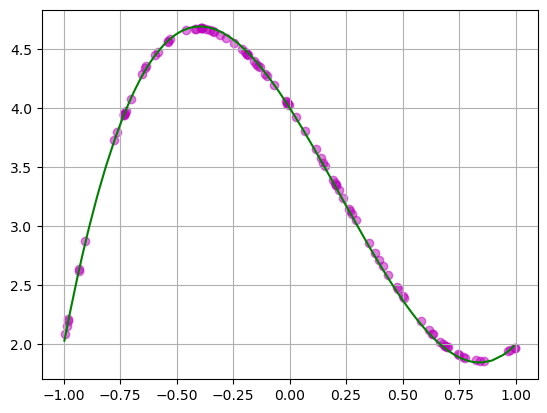

4/4 [==============================] - 0s 3ms/step


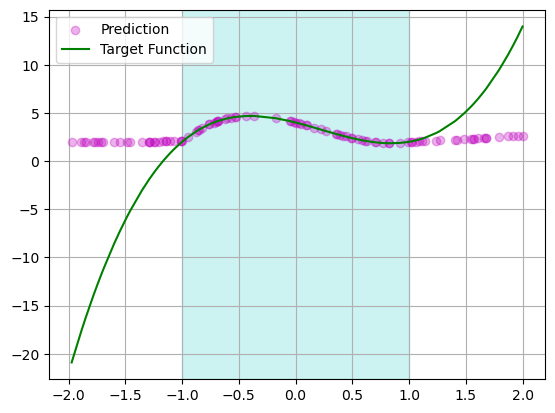

In [308]:
x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color='m', label = 'Prediction', alpha = 0.5)
plt.plot(x_valid, y_target, color = 'g', label = 'Target Function')
plt.grid(True)
plt.show()

x_predicted = np.random.uniform(-2, 2, 100)
y_predicted = model.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color='m', label = 'Prediction', alpha = alpha_value, zorder=2)
plt.axvspan(-1, 1, color='c', alpha=0.2, zorder= 1)
x_predicted.sort()
y_target_ext = 4 - 3 * x_predicted -  2 * x_predicted**2 + 3 * x_predicted**3 
plt.plot(x_predicted, y_target_ext, color = 'g', label = 'Target Function', zorder= 3)
plt.grid(True)
plt.legend()
plt.show()

Rispetto al caso precedente (un layer con un neurone), si è costruita una NN più complessa. Si sono utilizzati 4 livelli con più neuroni per livello, facendo attenzione a non utilizzarne troppi pochi per livello perchè tale situazione porta a scarsi risultati. 

Dal grafico della loss in funzione delle epoche si può notare che:
- la loss di training diminuisce molto rapidamente nelle prime epoche e poi si stabilizza assumendo valori vicini a zero;
- anche la loss di test ha un andamento simile a quello della loss di trainig che fa supporre che il modello non stia facedno overfitting.
  
Osservando gli ultimi grafici prodotti, si può notare che il modello predice bene l'andamento della funzione nell'intervallo in cui è stato allenato. Al di fuori di questo intervallo il modello non sa predire la funzione, in particolare mostra un andamento pressochè costante per $x>1$ e un andamento decrescente per $x<-1$ andando verso x minori. 

Come funzione di attivazione si è scelta la **reLu** perchè è una delle più utilizzate nei layers di input o nascosti delle NN. Tuttavia anche le funzioni di attivazione **softsigh** e **sigmoid** danno una buona predizione dell'andamento. 
Per quanto riguarda l'ottimizzatore, invece, **sgd** non ha dato l'impressione di predire bene nell'intervallo $[0.75, 1]$ dove cambia molto la curvatura della funzione. L'ottimizzatore **adadelta** dà una predizione pessima dell'andamento della funzione in tutto l'intervallo di test e al di fuori di questo. Dopo alcuni tentativi si è trovato che uno degli ottimizzatori che ha dato migliori risultati all'interno dell'intervallo di test è **adam**. Adam è descritta positivamente anche in https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam in quanto gli autori dell'algoritmo (Kingma D. P., Ba J. (2014) Adam: A Method for Stochastic Optimization) affermano che "the method is computationally efficient, has little memory requirement, invariant to diagonal rescaling of gradients, and is well suited for problems that are large in terms of data/parameters".

### <span style="color:royalblue">Esercizio 11.3
Si estende il modello per restituire un fit della deguente funzione trigonometrica 2D:
$$f(x,y) = \sin(x^2+y^2)$$
nel range $x \in [-3/2,3/2]$ e $y \in [-3/2,3/2]$.

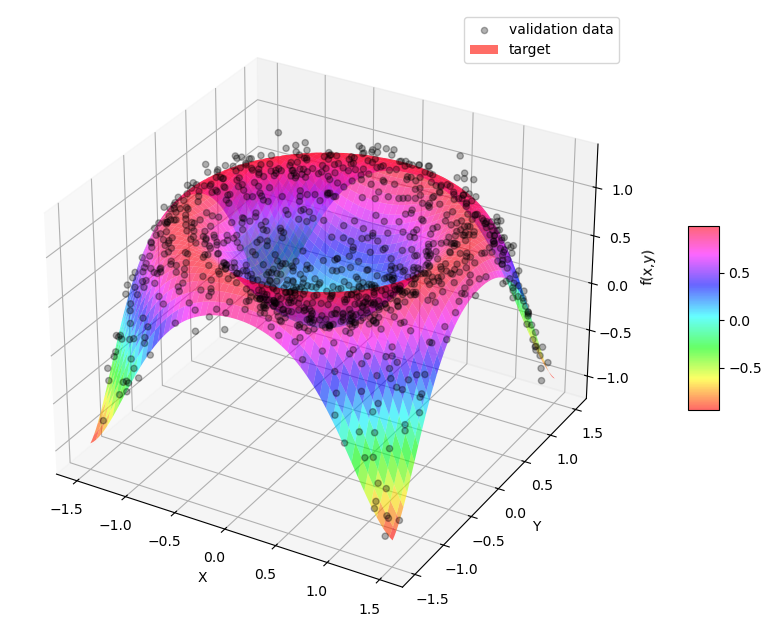

In [343]:
from mpl_toolkits.mplot3d import Axes3D

sigma = 0.1
N_epochs = 50
N_train = 10000
perc_valid = 10
#-----------------------------------------------
N_valid = int(N_train * perc_valid / 100 )

np.random.seed(0)
x_train = np.random.uniform(-3/2, 3/2, size = (N_train, 2))
x_valid = np.random.uniform(-3/2, 3/2, size = (N_valid, 2))
#x_valid.sort()

x_v = x_valid[:,0]
y_v = x_valid[:,1]
x_t = x_train[:,0]
y_t = x_train[:,1]

f_target = np.sin ( x_v**2 + y_v**2 )

f_train = np.random.normal(np.sin ( x_t**2 + y_t**2 ) , sigma) # actual measures from which we want to guess regression parameters
f_valid = np.random.normal(np.sin ( x_v**2 + y_v**2 ) , sigma) # dataset di test

# plot 3D validation and target dataset
fig = plt.figure(figsize = (16,8))
ax = fig.add_subplot(111, projection = '3d')

ax.scatter(x_v, y_v, f_valid, color = 'k', label='validation data', alpha = alpha_value)

x_grid = np.linspace(min(x_v), max(x_v), 100)
y_grid = np.linspace(min(y_v), max(y_v), 100)
X, Y = np.meshgrid(x_grid, y_grid) #prende due vettori e li trasforma in matrice
Z = np.sin ( X**2 + Y**2 )
surf = ax.plot_surface(X, Y, Z, cmap = 'hsv', edgecolor = 'none', alpha = 2*alpha_value, label='target')

#https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.colorbar.html
fig.colorbar(surf, ax=ax, shrink = 0.3, aspect = 6, fraction = 0.15)

ax.legend('Target surface')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('f(x,y)')

plt.legend()
plt.show()

In [351]:
#import os
#os.environ["TF_CPP_MIN_LOG_LEVEL"] = "3"

#Scelgo il modello di keras che voglio utilizzare
model = tf.keras.Sequential()
#Aggiungo al modello un layer densamente connesso con 1 unita' con input_shape 1, ovvero un punto:
model.add(Dense(64, input_shape=(2,), activation = 'relu'))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(16, activation = 'relu'))
model.add(Dense(1,)) #1 dato di output

# Dopo che ho costruito il modello, configuro il suo processo di learning chiamando il metodo compile. 
# optimizer: specifica l'algoritmo di ottimizzazione che adatta i pesi dei layers durnate il processo di allenamento sgd=stochastic gradient descent
# loss: specifica la funzione da minimizzare duirante l'ottimizzazione
# metrics: giudica la performace del modello ed e' usata per monitorere l'allenamento
model.compile(optimizer='adam', loss='mse', metrics=['mse']) #https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam

#According to Kingma et al., 2014, the method is "computationally efficient, has little memory requirement, invariant to diagonal rescaling 
#of gradients, and is well suited for problems that are large in terms of data/parameters".

# get a summary of our composed model
model.summary()

Model: "sequential_46"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_120 (Dense)           (None, 64)                192       
                                                                 
 dense_121 (Dense)           (None, 32)                2080      
                                                                 
 dense_122 (Dense)           (None, 16)                528       
                                                                 
 dense_123 (Dense)           (None, 1)                 17        
                                                                 
Total params: 2,817
Trainable params: 2,817
Non-trainable params: 0
_________________________________________________________________


In [352]:
history = model.fit(x=x_train, y=f_train,  #training input
          batch_size=32,  #dimensione dei batches in cui il modello spezza i dati e itera su questo numero per il training
                    epochs=N_epochs,   #un'iterazione su tutti i dati di input
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, f_valid))   #per calcolare loss e metrics alla fine di ogni epoca

Epoch 1/50
313/313 [==============================] - 2s 3ms/step - loss: 0.1687 - mse: 0.1687 - val_loss: 0.1197 - val_mse: 0.1197
Epoch 2/50
313/313 [==============================] - 1s 2ms/step - loss: 0.0719 - mse: 0.0719 - val_loss: 0.0289 - val_mse: 0.0289
Epoch 3/50
313/313 [==============================] - 1s 2ms/step - loss: 0.0181 - mse: 0.0181 - val_loss: 0.0118 - val_mse: 0.0118
Epoch 4/50
313/313 [==============================] - 1s 2ms/step - loss: 0.0122 - mse: 0.0122 - val_loss: 0.0129 - val_mse: 0.0129
Epoch 5/50
313/313 [==============================] - 1s 2ms/step - loss: 0.0118 - mse: 0.0118 - val_loss: 0.0113 - val_mse: 0.0113
Epoch 6/50
313/313 [==============================] - 1s 2ms/step - loss: 0.0119 - mse: 0.0119 - val_loss: 0.0140 - val_mse: 0.0140
Epoch 7/50
313/313 [==============================] - 1s 2ms/step - loss: 0.0119 - mse: 0.0119 - val_loss: 0.0118 - val_mse: 0.0118
Epoch 8/50
313/313 [==============================] - 1s 2ms/step - loss: 0.

In [353]:
# evaluate model
score = model.evaluate(x_valid, f_valid, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

32/32 [==============================] - 0s 2ms/step - loss: 0.0106 - mse: 0.0106

Test loss: 0.01063076313585043
Test accuracy: 0.01063076313585043


In [354]:
# evaluate model with the exact curve
score = model.evaluate(x_valid, f_target, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

32/32 [==============================] - 0s 2ms/step - loss: 0.0012 - mse: 0.0012

Test loss: 0.0012284403201192617
Test accuracy: 0.0012284403201192617


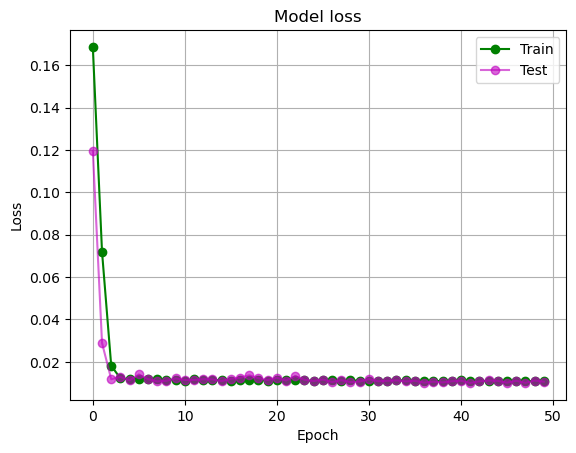

In [355]:
# look into training history
# Plot training & validation loss values
plt.plot(history.history['loss'], color = 'g', marker= 'o', linestyle='-')
plt.plot(history.history['val_loss'], color = 'm', marker= 'o', linestyle='-', alpha = 2*alpha_value)
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.grid(True)
plt.show()

313/313 [==============================] - 1s 1ms/step


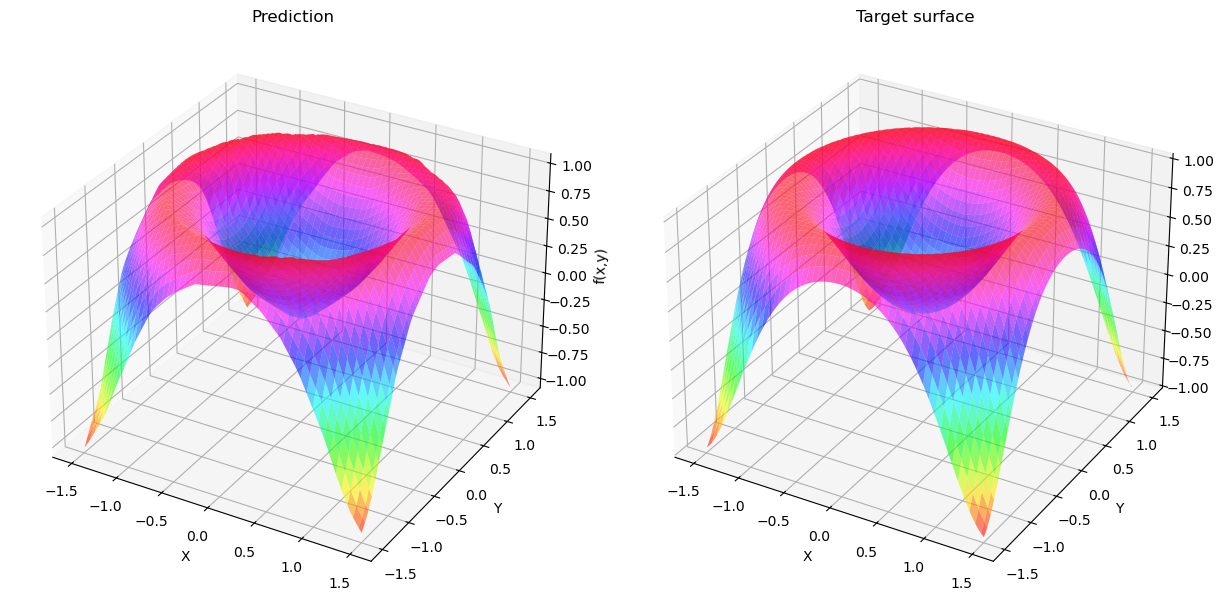

In [356]:
#Uso X e Y della meshgrid definita sopra
#Uso Z (funzione vera) definita in precedenza
grid_points = np.column_stack([X.ravel(), Y.ravel()]) #crea un array con le coppie x, y
f_predicted = model.predict(grid_points)
f_predicted = f_predicted.reshape(X.shape)

# plot 3D validation and target dataset
fig = plt.figure(figsize = (12,8))

ax1 = fig.add_subplot(1, 2, 1, projection = '3d')
surf1 = ax1.plot_surface(X, Y, f_predicted, cmap = 'hsv', alpha = 2*alpha_value )
ax1.set_title('Prediction')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('f(x,y)')

ax2 = fig.add_subplot(1, 2, 2, projection = '3d')
surf2 = ax2.plot_surface(X, Y, Z, cmap = 'hsv', alpha = 2*alpha_value )
ax2.set_title('Target surface')
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
#ax2.set_zlabel('f(x,y)') #Non lo metto perchè l'asse z è come nel primo plot

#https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.colorbar.html
#fig.colorbar(surf, ax=ax, shrink = 0.3, aspect = 6, fraction = 0.15, location = 'right', orientation = 'vertical')
plt.tight_layout(pad=0.4, w_pad=4, h_pad=1.0)
plt.show()

Le due superfici sono qualitativamente simili. Si nota che quella di sinistra (Presizione) è più irregolare rispetto a quella di destra (Target) che invece risulta più smooth.
Le considerazioni fatte precedentemente riguardo le funzioni di attivazione, gli ottimizzatori e i neuroni per livello rimandono valide anche in questo caso. 